In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('housing data.csv')

In [3]:
df

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Creo el dataframe y me doy cuenta que las columnas son valores

In [4]:
df = df.rename(columns={'0.00632' :'CRIM','18.00' : 'ZN', '2.310' : 'INDUS', '0' : 'CHAS', '0.5380' : 'NOX', '6.5750':'RM', '65.20':'AGE', '4.0900':'DIS', '1':'RAD', '296.0':'TAX', '15.30':'RTRATIO', '396.90':'B', '4.98':'LSTAT', '24.00':'MEDV'})

In [5]:
nueva_fila = pd.Series({'CRIM':0.00632, 'ZN':18, 'INDUS':2.310, 'CHAS':0, 'NOX':0.538, 'RM':6.575, 'AGE':65.20, 'DIS':4.09, 'RAD':1, 'TAX':296, 'RTRATIO':15.3, 'B':396.9, 'LSTAT':4.98, 'MEDV':24})
df = df.append(nueva_fila, ignore_index=True)

D:\users\ciberintegra_14\AppData\Local\Temp\ipykernel_7600\1904589545.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Cambio el nombre de las columnas por aquellas que ven abajo, y agrego los datos en una nueva fila.

## Datos de vivienda de Boston
#### Valor de la vivienda en los suburbios de Boston.

    1. CRIM: tasa de criminalidad per cápita por ciudad
    2. ZN: proporción de suelo residencial zonificado para lotes de más 25,000 pies cuadrados.
    3. INDUS: proporción de acres de negocios no minoristas por ciudad
    4. CHAS: variable ficticia de Charles River (= 1 si el tramo limitarío; 0 en caso contrario)
    5. NOX: concentración de óxidos nítricos (partes por 10 millones)
    6. RM: número medio de habitaciones por vivienda
    7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    8. DIS: distancias ponderadas a cinco centros de empleo de Boston
    9. RAD: índice de accesibilidad a carreteras radiales
    10.TAX: tasa de impuesto a la propiedad de valor total por $10,000.
    11.PTRATIO: ratio alumnos-profesor por localidad
    12.B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    13.LSTAT: % de estatus más bajo de la población.
    14.MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
RTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checamos los null y los duplicados, para hacer limpieza. Tambien hacemos un describe para analizar los datos.

In [10]:
pd.get_dummies(df['RAD'], prefix='RAD')

,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


RAD es un índice de carreteras, por lo que los numeros que tenemos realmente son valores string no númericos por lo que vamos a convertirlo en dummies.

Esto consiste en tomar el valor de la variable, crear una tabla por cada valor que tiene y marcar en cada columna con un 1 o un 0 dependiendo si cumple en la carecteristica. 

En RAD si el valor es 2 entonces tendra 1 en RAD_2.0 mientras que en los demas tendra 0 ya que no cumple las carecteristicas.

In [11]:
df = pd.concat([df, pd.get_dummies(df['RAD'], prefix='RAD')], axis=1)

Unimos en nuestro df los dummies que creamos y eliminamos RAD.

In [12]:
pd.set_option('display.max_columns',500)
df = df.drop('RAD', axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,MEDV,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,0,1,0,0,0,0,0,0,0
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,0,1,0,0,0,0,0,0,0
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,0,0,1,0,0,0,0,0,0
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,0,0,1,0,0,0,0,0,0
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222.0,18.7,394.12,5.21,28.7,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,1,0,0,0,0,0,0,0,0
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,1,0,0,0,0,0,0,0,0
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,1,0,0,0,0,0,0,0,0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,273.0,21.0,396.90,7.88,11.9,1,0,0,0,0,0,0,0,0


In [13]:
x = df.drop('MEDV', axis = 1)

In [14]:
y = df['MEDV']

In [15]:
from scipy.stats import shapiro

In [16]:
Datos_numerico = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'RTRATIO', 'B', 'LSTAT']

In [17]:
for elemento in x[Datos_numerico]:
    stat, p = shapiro(x[elemento])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(elemento, ':Probablemente Gaussiana')
    else:
        print(elemento, ':Probablemente no Gaussiana')

stat=0.450, p=0.000
CRIM :Probablemente no Gaussiana
stat=0.556, p=0.000
ZN :Probablemente no Gaussiana
stat=0.900, p=0.000
INDUS :Probablemente no Gaussiana
stat=0.936, p=0.000
NOX :Probablemente no Gaussiana
stat=0.961, p=0.000
RM :Probablemente no Gaussiana
stat=0.892, p=0.000
AGE :Probablemente no Gaussiana
stat=0.903, p=0.000
DIS :Probablemente no Gaussiana
stat=0.815, p=0.000
TAX :Probablemente no Gaussiana
stat=0.904, p=0.000
RTRATIO :Probablemente no Gaussiana
stat=0.477, p=0.000
B :Probablemente no Gaussiana
stat=0.937, p=0.000
LSTAT :Probablemente no Gaussiana


Vamos a hacer la estandarización/normalización de los datos númericos.

Primero checamos cuales son los datos normales.

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


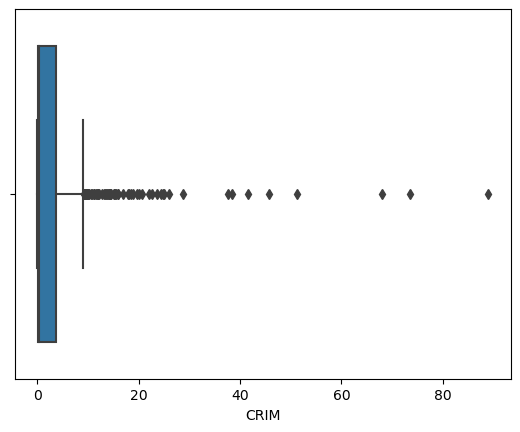

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


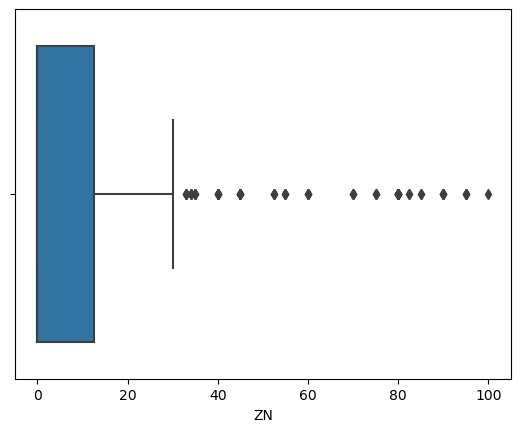

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


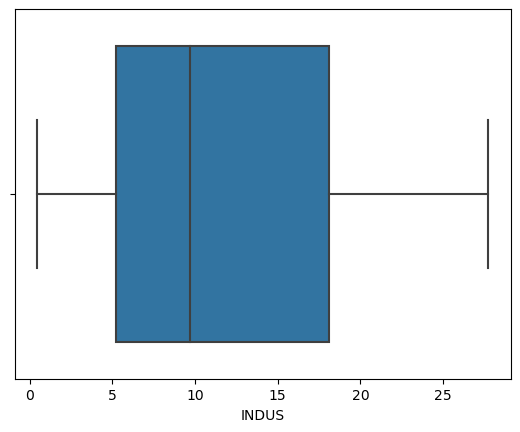

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


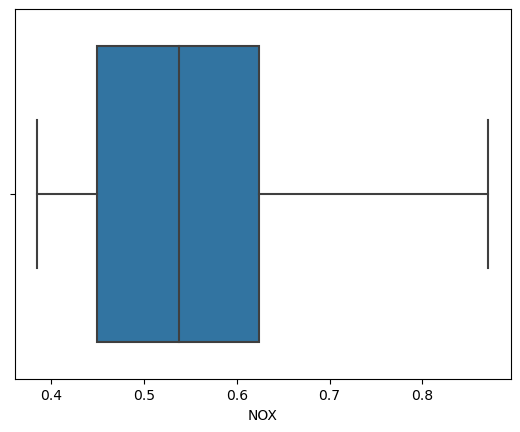

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


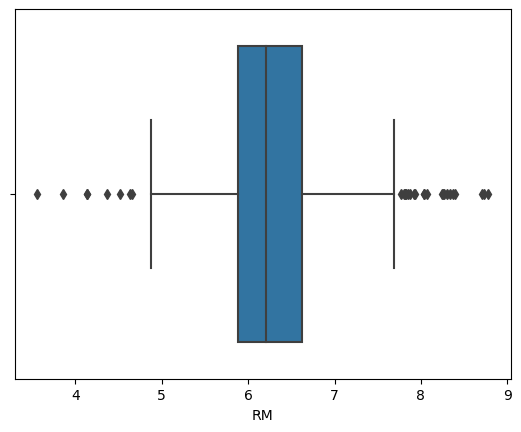

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


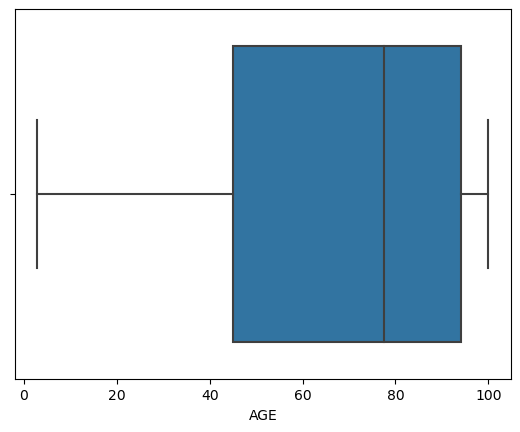

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


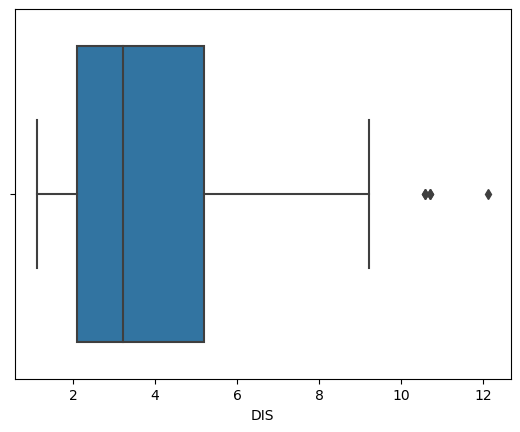

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


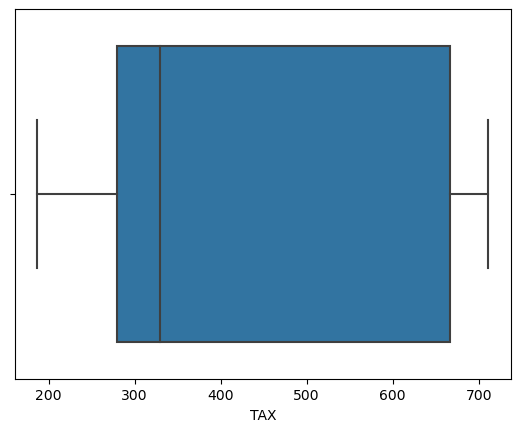

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


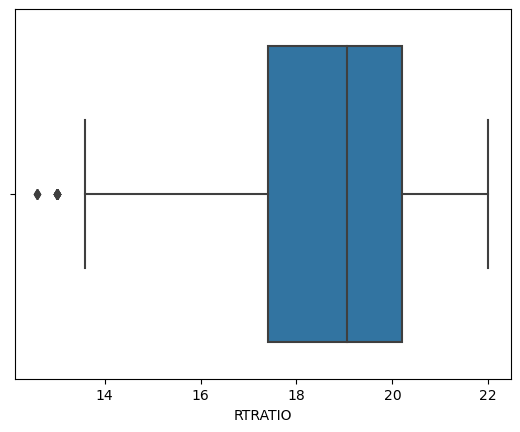

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


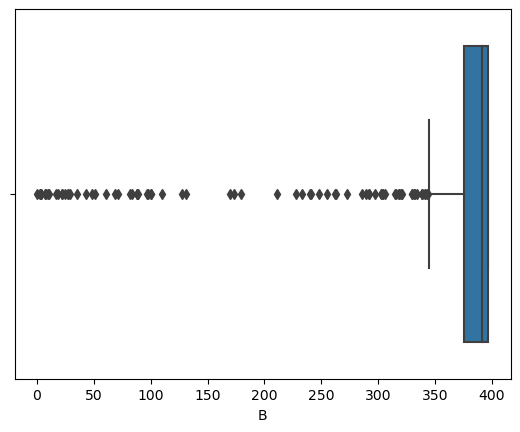

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


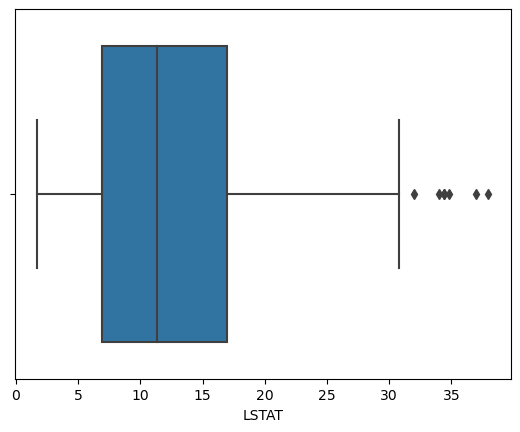

In [18]:
for elemento in x[Datos_numerico]:
    sns.boxplot(x[elemento])
    plt.show()

No hay datos normales, entonces ahora checamos via boxplot cuales tienen outlier (o datos atípicos) y cuales no y los dividimos correspondientemente.

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
Atipicos = ['CRIM', 'ZN', 'RM', 'DIS', 'RTRATIO', 'B', 'LSTAT']
Tipicos = ['INDUS', 'NOX', 'AGE', 'TAX']

In [21]:
mms = MinMaxScaler()
x[Tipicos] = mms.fit_transform(x[Tipicos])

In [22]:
rs = RobustScaler()
x[Atipicos] = rs.fit_transform(x[Atipicos])

Aplicamos MinMaxScaler a aquellos sin outlier y RobustScaler a los que sí.

In [47]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,-0.063755,0.00,0.242302,0.0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0,1,0,0,0,0,0,0,0
1,-0.063760,0.00,0.242302,0.0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,0,1,0,0,0,0,0,0,0
2,-0.062347,0.00,0.063050,0.0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0,0,1,0,0,0,0,0,0
3,-0.052144,0.00,0.063050,0.0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0,0,1,0,0,0,0,0,0
4,-0.063048,0.00,0.063050,0.0,0.150206,0.300136,0.574665,0.924391,0.066794,-0.125000,0.128553,-0.614693,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.058759,0.00,0.420455,0.0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,0.261902,-0.227886,1,0,0,0,0,0,0,0,0
502,-0.054450,0.00,0.420455,0.0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,0.261902,-0.571714,1,0,0,0,0,0,0,0,0
503,-0.040867,0.00,0.420455,0.0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,0.096414,-0.487756,1,0,0,0,0,0,0,0,0
504,-0.058164,0.00,0.420455,0.0,0.386831,-0.241870,0.802266,-0.227459,0.164122,0.696429,0.261902,-0.347826,1,0,0,0,0,0,0,0,0


In [48]:
y

0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
501    20.6
502    23.9
503    22.0
504    11.9
505    24.0
Name: MEDV, Length: 506, dtype: float64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

Separamos los datos en train-test en 80-20. Usando 'MEDV' ya que es dato que buscamos predecir.

In [24]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
192,-0.065268,4.80,0.090543,0.0,0.032922,0.801491,0.072091,0.975358,0.148855,-1.232143,0.092577,-0.632684,1,0,0,0,0,0,0,0,0
138,0.080113,0.00,0.785557,0.0,0.491770,-0.077913,0.978373,-0.498260,0.477099,0.767857,0.261902,0.709645,0,0,0,1,0,0,0,0,0
251,-0.048483,1.76,0.197947,0.0,0.094650,1.014228,0.040165,1.845463,0.272901,0.017857,-0.256625,-0.782609,0,0,0,0,0,0,1,0,0
13,0.106105,0.00,0.281525,0.0,0.314815,-0.152439,0.840371,0.406201,0.229008,0.696429,-0.547788,-0.109945,0,0,0,1,0,0,0,0,0
256,0.098756,1.60,0.128666,0.0,0.539095,3.381436,0.865088,-0.455420,0.146947,-2.160714,-0.083463,-0.623688,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,6.714058,0.00,0.646628,0.0,0.648148,-2.109079,1.000000,-0.563507,0.914122,0.410714,0.261902,1.691154,0,0,0,0,0,0,0,0,1
197,-0.060870,6.40,0.038856,0.0,0.039095,1.443767,0.364573,1.328115,0.270992,-2.303571,0.036455,-0.473763,0,1,0,0,0,0,0,0,0
439,6.062410,0.00,0.646628,0.0,0.730453,-0.529133,0.921730,-0.434307,0.914122,0.410714,0.000480,1.074463,0,0,0,0,0,0,0,0,1
174,-0.052814,0.00,0.131598,0.0,0.257202,0.457317,0.311020,-0.024334,0.208015,-0.875000,-0.023024,-0.602699,0,0,0,0,1,0,0,0,0


In [25]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
8,-0.024053,1.0,0.271628,0.0,0.286008,-0.277100,0.854789,1.095977,0.236641,-1.375000,-0.226886,0.573713,0,0,0,0,1,0,0,0,0
289,-0.061610,6.4,0.164589,0.0,0.053498,0.884146,0.257467,0.618230,0.110687,0.053571,0.261902,-0.802599,0,0,0,1,0,0,0,0,0
68,-0.035702,1.0,0.205645,0.0,0.049383,-0.438347,0.309990,1.065506,0.301527,-0.053571,0.261902,-0.256872,0,0,0,1,0,0,0,0,0
211,-0.010937,0.0,0.371334,1.0,0.213992,-0.544038,0.524202,0.144143,0.171756,-0.160714,-0.023984,0.466767,0,0,0,1,0,0,0,0,0
226,0.043357,0.0,0.210411,0.0,0.244856,1.293360,0.792997,0.002671,0.229008,-0.589286,-0.928649,-0.499750,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1.505817,0.0,0.646628,1.0,0.506173,0.642954,0.967044,-0.599288,0.914122,0.410714,-0.772755,-0.762619,0,0,0,0,0,0,0,0,1
144,0.590489,0.0,0.700880,0.0,1.000000,-0.106369,1.000000,-0.579082,0.412214,-1.553571,-10.482312,1.643178,0,0,0,0,1,0,0,0,0
336,-0.062892,0.0,0.173387,0.0,0.267490,-0.424797,0.583934,0.779584,0.070611,0.410714,0.161650,-0.079960,0,0,0,0,1,0,0,0,0
437,3.733366,0.0,0.646628,0.0,0.730453,-0.370596,0.875386,-0.449073,0.914122,0.410714,-15.469001,2.264868,0,0,0,0,0,0,0,0,1


In [26]:
y_train

192    31.1
138    17.8
251    29.6
13     18.2
256    50.0
       ... 
385    10.5
197    34.6
439    10.5
174    29.4
122    17.3
Name: MEDV, Length: 404, dtype: float64

In [27]:
y_test

8      18.9
289    28.5
68     20.9
211    22.4
226    31.6
       ... 
368    50.0
144    13.8
336    18.5
437     8.4
216    28.7
Name: MEDV, Length: 102, dtype: float64

---

# Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
modelLR = LinearRegression().fit(x_train, y_train)

In [30]:
RF = RandomForestRegressor(random_state = 42)
RF.fit(x_train, y_train);

Aquí hacemos los modelos y los entrenamos. A continuación vamos a ponerlos aprueba.

In [31]:
predictions = modelLR.predict(x_test)

In [32]:
predictionsRF = RF.predict(x_test)

Text(0.5, 1.0, 'Estudio de las predicciones')

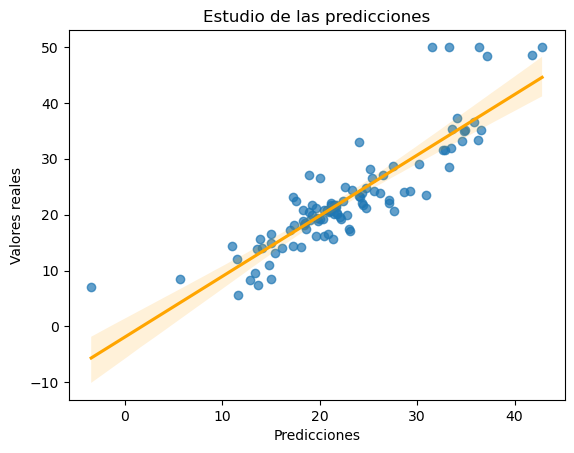

In [33]:
sns.regplot(x=predictions, y=y_test, data=x_train, scatter_kws={'alpha': 0.7}, line_kws={'color': 'orange'});

plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Estudio de las predicciones')

Los puntos representan la correlación entre las predicciones y los datos. Mientras más cerca esten los puntos de la línea mayor es la correlación entre las predicciones y los valores reales.

Los puntos estan configurados para que si es un único punto se vea de un color más claro mientras que los más oscuros son una aglomeración de puntos.

En este caso podemos ver como la predicción y los datos de prueba son muy similares en la mitad de la gráfica mientras que en los extremos difieren notablemente.

Text(0.5, 1.0, 'Estudio de las predicciones')

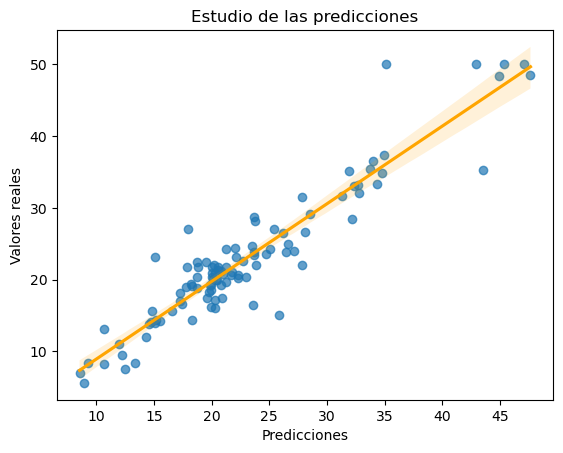

In [34]:
sns.regplot(x=predictionsRF, y=y_test, data=x_train, scatter_kws={'alpha': 0.7}, line_kws={'color': 'orange'});

plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Estudio de las predicciones')

Aquí vemos como en general la correlación entre las prediciones y los datos es bastante buena, hasta que llegamos a la punta donde se ve como un par de puntos se separan considerablemente.

Aunque algunos puntos en el medio estan algo separdos, ni es muchos y la mayoria estan bastante cerca de la línea por lo que podemos asumir que es bueno.

# Ejercicio 2
Compárales en base al MSE y al R2.

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
R2_LR = r2_score(y_test, predictions)
MSE_LR = mean_squared_error(y_test, predictions)
R2_RF = r2_score(y_test, predictionsRF)
MSE_RF = mean_squared_error(y_test, predictionsRF)

In [37]:
print('El error cuadrático medio (MSE) en el modelo de regresión lineal es ',MSE_LR)

El error cuadrático medio (MSE) en el modelo de regresión lineal es  20.82024490084548


In [38]:
print('El error cuadrático medio (MSE) en el random forest regressor es ',MSE_RF)

El error cuadrático medio (MSE) en el random forest regressor es  11.140878715686275


In [39]:
print('El coeficiente de determinación (R2) en el modelo de regresión lineal es ', R2_LR)

El coeficiente de determinación (R2) en el modelo de regresión lineal es  0.7677545606448253


In [40]:
print('El coeficiente de determinación (R2) en el random forest regressor es ', R2_RF)

El coeficiente de determinación (R2) en el random forest regressor es  0.8757258483533878


Aquí calculamos tanto el error cuadratico medio como el coeficiente de determinación.

Estos son calculos que hacemos para hacer una evalución de la eficiencia de nuestro modelo.

R2: responde a la pregunta de si este modelo simple tiene un error mayor que el modelo de regresión lineal. En este caso, la mejor puntiación es 1.0.

MSE: Calcula la diferencia entre lo que dio y lo que debio dar, mientras más alto mayor la distancia de los valores.

Arriba tenemos los resultados númerico, pero abajo grafique los mismos datos para compararlos más facilmente.

Text(0.5, 1.0, 'Comparación de R2 Score entre Modelos')

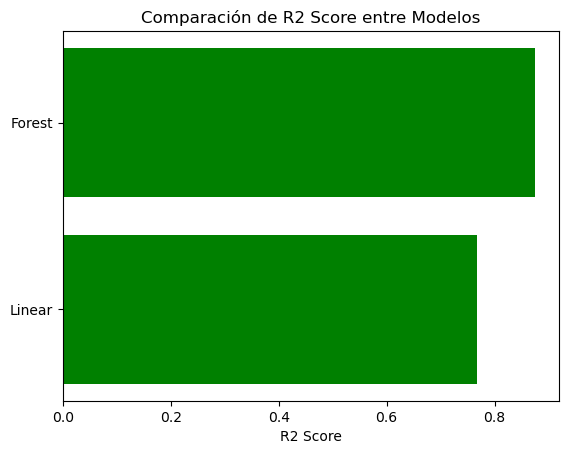

In [41]:
plt.barh(['Linear', 'Forest'], [R2_LR, R2_RF], color='green')
plt.xlabel('R2 Score')
plt.title('Comparación de R2 Score entre Modelos')

Aquí vemos el puntaje R2 y lo que vemos es como RandomForest esta más cerca del 1 que LinearRegression.

Por lo que según el coeficiente de deteminación, RandomForest es más preciso.

Text(0.5, 1.0, 'Comparación de MSE Score entre Modelos')

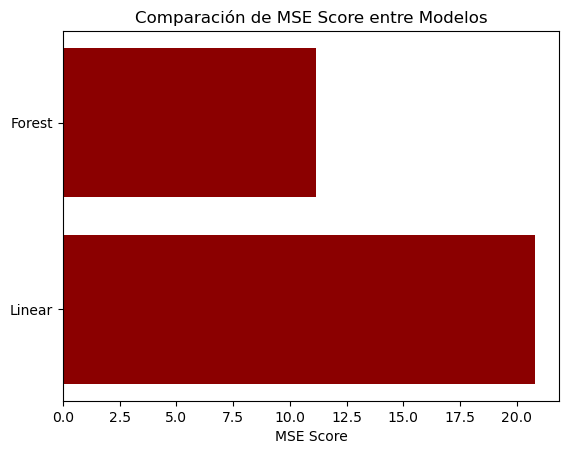

In [42]:
plt.barh(['Linear', 'Forest'], [MSE_LR, MSE_RF], color='darkred')
plt.xlabel('MSE Score')
plt.title('Comparación de MSE Score entre Modelos')

Ahora comparamos el MSE y vemos como esta vez como LinearRegression supera a RandomForest por un amplio margen. Pero como ya mencione antes, esto es malo.

Entonces tenemos que la distancia de los valores predichos y los reales son mayores en LinearRegression que en RandomForest.

Por lo que podemos concluir que según el error cuadrático medio: RandomForest es mejor modelo.

# Ejercicio 3
Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
parametros_LR = {
    "fit_intercept" : [True, False],
    "copy_X" : [True, False],
    "n_jobs" : [1 , 3, 5],
    "positive" : [True, False]
                }
parametros_RF = {
    "criterion" : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    "max_depth" : [ 3, 6, 9],
    "n_jobs" : [1 , 3, 5],
    "min_samples_split" : [2, 4, 6]
                }

Utilizaremos GridSearch para crear modelos con nuevos y así descubrir los mejores parametros.

Lo primero que hacemos es establecer los parametros que queremos estudie.

In [45]:
Modelos = [('Linear', LinearRegression(), parametros_LR), ('Forest', RandomForestRegressor(random_state = 42), parametros_RF)]

In [46]:
resultados_modelos = {}

for nombre, modelo, parametros in Modelos:
    print(f"Entrenando modelo: {nombre}")
    
    GS = GridSearchCV(estimator = modelo,
                  param_grid = parametros,
                  scoring = ["r2", "neg_mean_squared_error"],
                  refit = 'r2',
                  cv = 5,
                  verbose = 4
                 )
    GS.fit(x_train, y_train)
    
    resultados_modelos[nombre] = {
        "mejores_parametros": GS.best_params_,
        "mejor_resultado_r2": GS.best_score_,
        "mejor_modelo": GS.best_estimator_
    }
    print("\n" + "="*40 + "\n")


Entrenando modelo: Linear
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-32.978) r2: (test=0.609) total time=   0.0s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-40.803) r2: (test=0.364) total time=   0.0s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-40.852) r2: (test=0.484) total time=   0.0s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-24.222) r2: (test=0.683) total time=   0.0s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; neg_mean_squared_error: (test=-44.947) r2: (test=0.579) total time=   0.0s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; neg_mean_squared_error: (test=-20.900) r2: (test=0.752) total time=   0.0s
[CV 2/5] END copy_X=True, fit_inter

[CV 4/5] END copy_X=False, fit_intercept=False, n_jobs=1, positive=False; neg_mean_squared_error: (test=-17.454) r2: (test=0.771) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=1, positive=False; neg_mean_squared_error: (test=-36.138) r2: (test=0.662) total time=   0.0s
[CV 1/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-32.978) r2: (test=0.609) total time=   0.0s
[CV 2/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-40.803) r2: (test=0.364) total time=   0.0s
[CV 3/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-40.852) r2: (test=0.484) total time=   0.0s
[CV 4/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-24.222) r2: (test=0.683) total time=   0.0s
[CV 5/5] END copy_X=False, fit_intercept=False, n_jobs=3, positive=True; neg_mean_squared_error: (test=-44.947

[CV 3/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-12.974) r2: (test=0.836) total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-11.718) r2: (test=0.847) total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-25.107) r2: (test=0.765) total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-14.629) r2: (test=0.826) total time=   0.9s
[CV 2/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-18.091) r2: (test=0.718) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-12.974) r2: (test=0.836) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3, min_sam

[CV 2/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-15.970) r2: (test=0.751) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-9.436) r2: (test=0.881) total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-7.301) r2: (test=0.904) total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=6, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-21.505) r2: (test=0.799) total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=9, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-11.090) r2: (test=0.868) total time=   0.2s
[CV 2/5] END criterion=squared_error, max_depth=9, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-15.404) r2: (test=0.760) total time=   0.2s
[CV 3/5] END criterion=squared_error, max_depth=9, min_sampl

[CV 5/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-28.412) r2: (test=0.734) total time=   0.5s
[CV 1/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-14.247) r2: (test=0.831) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-18.710) r2: (test=0.708) total time=   0.2s
[CV 3/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-12.770) r2: (test=0.839) total time=   0.2s
[CV 4/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-10.098) r2: (test=0.868) total time=   0.2s
[CV 5/5] END criterion=absolute_error, max_depth=3, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-28.412) r2: (test=0.734) total time=   0.2s
[CV 1/5] END criterion=absolute_error, max_depth=3, 

[CV 2/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-16.062) r2: (test=0.750) total time=   0.3s
[CV 3/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-9.775) r2: (test=0.877) total time=   0.4s
[CV 4/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-7.328) r2: (test=0.904) total time=   0.4s
[CV 5/5] END criterion=absolute_error, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-21.953) r2: (test=0.794) total time=   0.7s
[CV 1/5] END criterion=absolute_error, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-11.604) r2: (test=0.862) total time=   0.9s
[CV 2/5] END criterion=absolute_error, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-16.093) r2: (test=0.749) total time=   0.9s
[CV 3/5] END criterion=absolute_error, max_depth=6, mi

[CV 4/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-7.236) r2: (test=0.905) total time=   1.0s
[CV 5/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-20.107) r2: (test=0.812) total time=   1.0s
[CV 1/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-10.720) r2: (test=0.873) total time=   0.6s
[CV 2/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-15.837) r2: (test=0.753) total time=   0.3s
[CV 3/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-9.404) r2: (test=0.881) total time=   0.3s
[CV 4/5] END criterion=absolute_error, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-7.236) r2: (test=0.905) total time=   0.3s
[CV 5/5] END criterion=absolute_error, max_depth=9, min

[CV 2/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-18.158) r2: (test=0.717) total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-12.973) r2: (test=0.836) total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-11.734) r2: (test=0.846) total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=3, min_samples_split=4, n_jobs=5; neg_mean_squared_error: (test=-25.101) r2: (test=0.765) total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-14.466) r2: (test=0.828) total time=   0.1s
[CV 2/5] END criterion=friedman_mse, max_depth=3, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-18.144) r2: (test=0.717) total time=   0.1s
[CV 3/5] END criterion=friedman_mse, max_depth=3, min_samples_sp

[CV 5/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=1; neg_mean_squared_error: (test=-21.413) r2: (test=0.799) total time=   0.1s
[CV 1/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-12.346) r2: (test=0.853) total time=   0.8s
[CV 2/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-15.958) r2: (test=0.751) total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-9.320) r2: (test=0.882) total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-7.343) r2: (test=0.904) total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=6, min_samples_split=6, n_jobs=3; neg_mean_squared_error: (test=-21.413) r2: (test=0.799) total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=6, min_samples_spli

[CV 4/5] END criterion=friedman_mse, max_depth=9, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-7.194) r2: (test=0.906) total time=   0.1s
[CV 5/5] END criterion=friedman_mse, max_depth=9, min_samples_split=6, n_jobs=5; neg_mean_squared_error: (test=-19.564) r2: (test=0.817) total time=   0.1s
[CV 1/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-59.684) r2: (test=0.292) total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-70.277) r2: (test=-0.095) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-73.941) r2: (test=0.067) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean_squared_error: (test=-62.783) r2: (test=0.178) total time=   0.1s
[CV 5/5] END criterion=poisson, max_depth=3, min_samples_split=2, n_jobs=1; neg_mean

[CV 5/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=3; neg_mean_squared_error: (test=-58.046) r2: (test=0.456) total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-43.338) r2: (test=0.486) total time=   0.1s
[CV 2/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-55.031) r2: (test=0.142) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-53.861) r2: (test=0.320) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-39.133) r2: (test=0.488) total time=   0.0s
[CV 5/5] END criterion=poisson, max_depth=6, min_samples_split=2, n_jobs=5; neg_mean_squared_error: (test=-58.046) r2: (test=0.456) total time=   0.0s
[CV 1/5] END criterion=poisson, max_depth=6, min_samples_split=4, n_jobs=1; neg_mean_squared_e

[CV 5/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=1; neg_mean_squared_error: (test=-50.985) r2: (test=0.523) total time=   0.2s
[CV 1/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-41.683) r2: (test=0.505) total time=   0.9s
[CV 2/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-51.181) r2: (test=0.202) total time=   0.1s
[CV 3/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-43.569) r2: (test=0.450) total time=   0.1s
[CV 4/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-30.982) r2: (test=0.594) total time=   0.1s
[CV 5/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=3; neg_mean_squared_error: (test=-50.985) r2: (test=0.523) total time=   0.1s
[CV 1/5] END criterion=poisson, max_depth=9, min_samples_split=4, n_jobs=5; neg_mean_squared_e

In [80]:
for nombre_modelo, resultados in resultados_modelos.items():
    print(f"Resultados para {nombre_modelo}:")
    print(f"Mejores parámetros: {resultados['mejores_parametros']}")
    print(f"Mejor resultado para R2: {resultados['mejor_resultado_r2']}")
    print(f"Mejor modelo: {resultados['mejor_modelo']}")
    print("\n" + "="*40 + "\n")

Resultados para Linear:
Mejores parámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Mejor resultado para R2: 0.6878128375852393
Mejor modelo: LinearRegression(n_jobs=1)


Resultados para Forest:
Mejores parámetros: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_split': 2, 'n_jobs': 1}
Mejor resultado para R2: 0.8486041634526533
Mejor modelo: RandomForestRegressor(max_depth=9, n_jobs=1, random_state=42)




Aquí vemos los resultados del GridSearch, que serian: los mejores parametros que encontro, su coeficiente de determinación (R2) y los errores cuadráticos medio (MSE) que encontro.

Text(0.5, 1.0, 'Comparación de R2 Score entre Modelos')

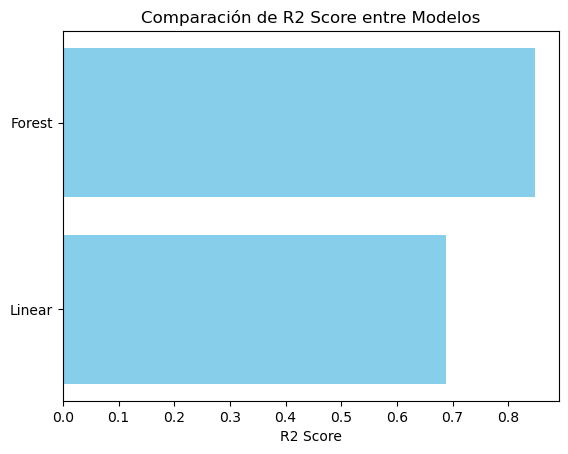

In [40]:
nombres_modelos = list(resultados_modelos.keys())

resultados_r2 = [resultados_modelos[nombre]["mejor_resultado_r2"] for nombre in nombres_modelos]

plt.barh(nombres_modelos, resultados_r2, color='skyblue')
plt.xlabel('R2 Score')
plt.title('Comparación de R2 Score entre Modelos')

Aquí lo tenemos más claro en esta grafica, donde vemos que nuevamente RandomForest a superado a LinearRegression, pero. ¿Mejoro en respecto a los valores predeterminados?

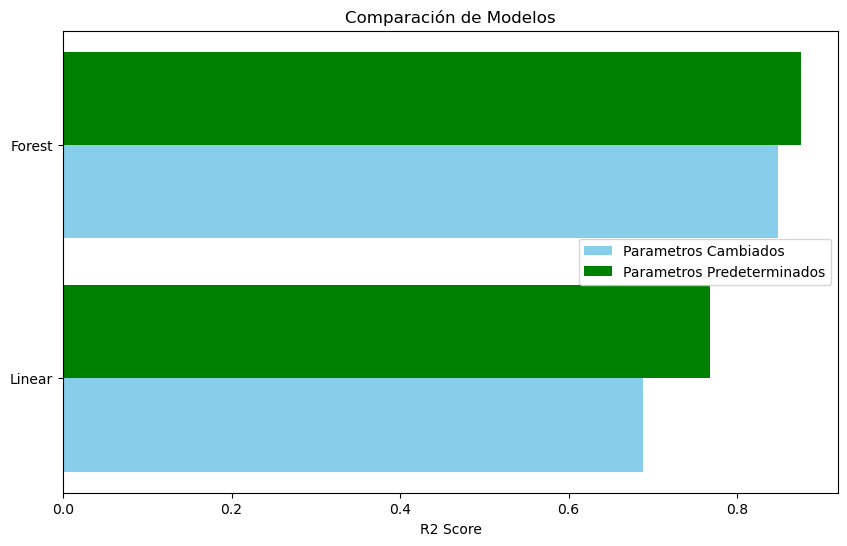

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4

posiciones_r2 = np.arange(len(nombres_modelos))
posiciones_resultados = posiciones_r2 + bar_width

ax.barh(posiciones_r2, resultados_r2, height=bar_width, color='skyblue', label='Parametros Cambiados')

ax.barh(posiciones_resultados, [R2_LR, R2_RF], height=bar_width, color='green', label='Parametros Predeterminados')

ax.set_yticks(posiciones_r2 + bar_width / 2)
ax.set_yticklabels(nombres_modelos)
ax.set_xlabel('R2 Score')
ax.set_title('Comparación de Modelos')
ax.legend()

Ahora podemos hacer una comparación como se debe, lo que vemos es como los valores predeterminados superan a GridSearch. 

# Ejercicio 4
Compara su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
Kfold = KFold(5)

In [44]:
pre_LR_val = cross_val_score(LinearRegression(), x, y, cv = Kfold)
pre_RF_val = cross_val_score(RandomForestRegressor(random_state = 42), x, y, cv = Kfold)
mod_LR_val = cross_val_score(LinearRegression(copy_X = True, fit_intercept = True, n_jobs = 1, positive = False), x, y, cv = Kfold)
mod_RF_val = cross_val_score(RandomForestRegressor(criterion = 'squared_error', max_depth = 9, min_samples_split = 2, n_jobs = 1, random_state = 42), x, y, cv = Kfold)

In [45]:
Validacion = [('Linear (predeterminado)', pre_LR_val), ('Linear (GridSearch)', mod_LR_val), ('Forest (predeterminado)', pre_RF_val), ('Forest (GridSearch)', mod_RF_val)]

In [46]:
for nombre, modelo in Validacion:
    print(f"{nombre}: \n")
    print(' Resultados: ', modelo,  '\n Media: ', modelo.mean(), '\n Deviración estandar: ', np.std(modelo), '\n\n', "-"*40, '\n')

Linear (predeterminado): 

 Resultados:  [ 0.61697379  0.74730179  0.52432597  0.00804385 -0.38830338] 
 Media:  0.30166840200731804 
 Deviración estandar:  0.4265816281918897 

 ---------------------------------------- 

Linear (GridSearch): 

 Resultados:  [ 0.61697379  0.74730179  0.52432597  0.00804385 -0.38830338] 
 Media:  0.30166840200731804 
 Deviración estandar:  0.4265816281918897 

 ---------------------------------------- 

Forest (predeterminado): 

 Resultados:  [0.77117545 0.86628824 0.66857709 0.433665   0.3029727 ] 
 Media:  0.6085356945812463 
 Deviración estandar:  0.20997215858973528 

 ---------------------------------------- 

Forest (GridSearch): 

 Resultados:  [0.77181381 0.86553382 0.66146886 0.43597568 0.29525293] 
 Media:  0.6060090205584192 
 Deviración estandar:  0.21137683338918964 

 ---------------------------------------- 



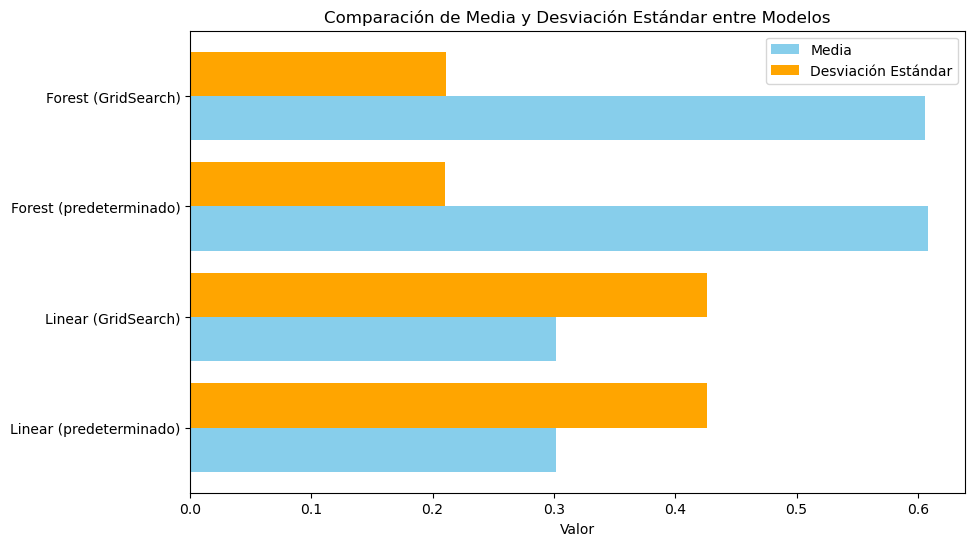

In [47]:
modelos, valores = zip(*Validacion)

fig, ax = plt.subplots(figsize=(10, 6))

posiciones_media = np.arange(len(modelos))
posiciones_desviacion = posiciones_media + bar_width

ax.barh(posiciones_media, [np.mean(valor) for valor in valores], height=bar_width, color='skyblue', label='Media')

ax.barh(posiciones_desviacion, [np.std(valor) for valor in valores], height=bar_width, color='orange', label='Desviación Estándar')

ax.set_yticks(posiciones_desviacion - bar_width / 2)
ax.set_yticklabels(modelos)
ax.set_xlabel('Valor')
ax.set_title('Comparación de Media y Desviación Estándar entre Modelos')
ax.legend()

Lo que vemos son por un lado los resultados de cada conjunto de datos que hizo, su media y su derivación estandar.

Le prestaremos especial atención a la media y a la derivación estandar.

La media nos muestra el promedio de nuestros resultados. Pero la derivación estandar nos mostrara que tan separados estan los datos. Es decir, aunque una media alta suena bien, si su derivación estandar es tambien alta, eso quiere decir que los datos son en realidad bastante impredecibles.

#### Observaciones: 

Regresión Linear tiene una media muy baja y una derivación estandar muy alta, por lo que el modelos es terrible. Cabe destacar que los valores predeterminados y los dados por GridSearch dan exactamente lo mismo.

RandomForestRegressor tiene una media más alta así como una derivación estandar más pequeña que Linear, por lo que podemos concluir que Forest es mejor modelo. Esta vez podemos ver como los valores del modelo con parametros predeterminados son ligeramente mejores que aquellos dados por GridSearch (aunque esto solo se puede ver en los números ya que la diferencia es minima).

---

# Ejercicio 5
No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

Con el RandomForestRegressor predeterminado hay que un nuevo modelo con los requisitos de arriba.

Anotar lo que significan los datos de las primeras graficas.

In [48]:
x_extra = x.drop('RM', axis = 1)

In [49]:
ex_train, ex_test, ey_train, ey_test = train_test_split(x_extra, y, test_size=0.20, random_state=4)

---

In [50]:
model_extra = RF.fit(ex_train, ey_train)

In [51]:
predictionsEX = model_extra.predict(ex_test)

In [52]:
R2_RF_EX = r2_score(ey_test, predictionsEX)

In [77]:
print('El coeficiente de determinación (R2) en el random forest regressor con RM es ', R2_RF)
print('El coeficiente de determinación (R2) en el random forest regressor sin RM es ', R2_RF_EX)

El coeficiente de determinación (R2) en el random forest regressor con RM es  0.8757414882424889
El coeficiente de determinación (R2) en el random forest regressor sin RM es  0.8478123556035666


Text(0.5, 1.0, 'Comparación de R2 Score entre Modelos de RandomForestRegressor')

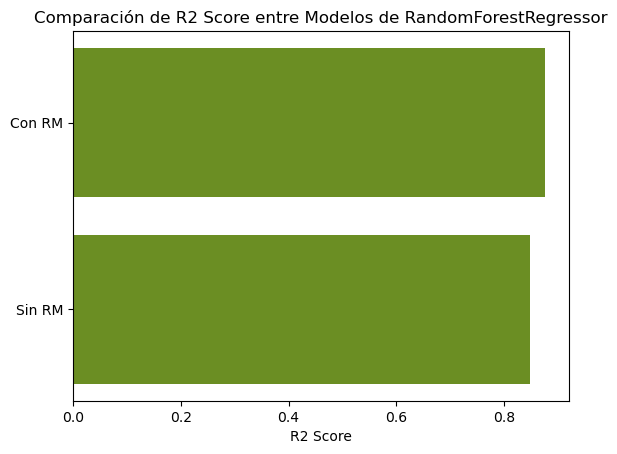

In [78]:
plt.barh(['Sin RM', 'Con RM'], [R2_RF_EX, R2_RF], color='OliveDrab')
plt.xlabel('R2 Score')
plt.title('Comparación de R2 Score entre Modelos de RandomForestRegressor')

Ahora estamos probando el modelo más eficiente que obtuvimos (RandomForestRegressor, predeterminado), contra si mismo, pero sin usar la variable RM, que es la media de habitantes por vivienda.

En teoria, al tener menos datos los resultados del nuevo modelo deberian ser inferiores, y en principio eso parece, ya que nuestro modelo anterior (el que sí tiene RM) es 0.03 puntos mejor que el nuevo (el que NO tiene RM). Pero un R2 alto no lo es todo

In [57]:
pre_RF_ex = cross_val_score(RandomForestRegressor(random_state = 42), x_extra, y, cv = Kfold)

In [58]:
Validacion_ex = [('Forest con RM', pre_RF_val), ('Forest sin RM', pre_RF_ex)]

In [59]:
for nombre, modelo in Validacion_ex:
    print(f"{nombre}: \n")
    print(' Resultados: ', modelo,  '\n Media: ', modelo.mean(), '\n Deviración estandar: ', np.std(modelo), '\n\n', "-"*40, '\n')

Forest con RM: 

 Resultados:  [0.77117545 0.86628824 0.66857709 0.433665   0.3029727 ] 
 Media:  0.6085356945812463 
 Deviración estandar:  0.20997215858973528 

 ---------------------------------------- 

Forest sin RM: 

 Resultados:  [0.6271126  0.83160873 0.38214082 0.62743185 0.39541199] 
 Media:  0.5727411980648359 
 Deviración estandar:  0.16777000456110813 

 ---------------------------------------- 



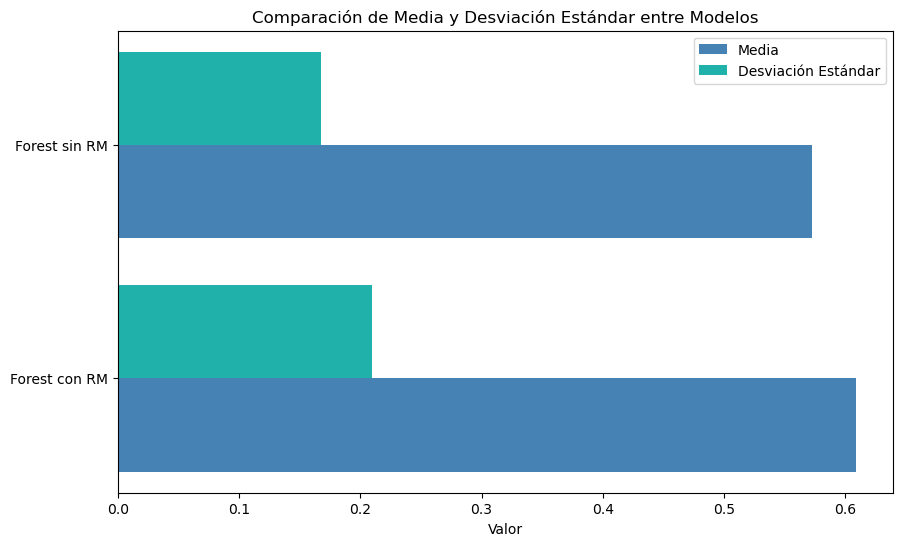

In [75]:
modelos, valores = zip(*Validacion_ex)

fig, ax = plt.subplots(figsize=(10, 6))

posiciones_media = np.arange(len(modelos))
posiciones_desviacion = posiciones_media + bar_width

ax.barh(posiciones_media, [np.mean(valor) for valor in valores], height=bar_width, color='SteelBlue', label='Media')

ax.barh(posiciones_desviacion, [np.std(valor) for valor in valores], height=bar_width, color='LightSeaGreen', label='Desviación Estándar')

ax.set_yticks(posiciones_desviacion - bar_width / 2)
ax.set_yticklabels(modelos)
ax.set_xlabel('Valor')
ax.set_title('Comparación de Media y Desviación Estándar entre Modelos')
ax.legend()

A continuación someti el nuevo modelo al cross validation y lo compare con el modelo viejo.

Los resultados fueron interesantes, ya que la media fue al igual que nuestra comparación de R2 fue de 0.03 en favor del modelo viejo. Pero la desviación estandar tambien fue superior y como sabemos, eso no es bueno, de hecho lo supero por 0.04, es decir, el viejo modelo tiende a tener mejores resultados pero el nuevo da resultados más estables.

Al final, concluyo que la media de habitantes por vivienda es una variable que puede dar información para deducir el valor medio de las viviendas, pero puede resultar confusa para el modelo.